In [1]:
model_name = 'google-bert/bert-base-uncased'

In [2]:
from transformers import BertTokenizer, TFBertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained(model_name)

model = TFBertForSequenceClassification.from_pretrained(model_name)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/03. path/Finetune_BERT/ar_reviews_100k.tsv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

df = pd.read_csv(file_path, sep='\t')

df

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


In [5]:
random_5_row = df.sample(n=5, random_state=42)

random_5_row

,label,text
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......


In [6]:
import numpy as np

sentiment_mapping = {
    0: 'mixed',
    1: 'negative',
    2: 'positive',
}

random_5_row = random_5_row.copy()

predicted_sentiments = []

for title in random_5_row['text']:

    inputs = tokenizer(title,)

    input_ids = inputs['input_ids']

    predictions = model.predict([input_ids])

    logits = predictions.logits

    predicted_class = np.argmax(logits)
    print("predicted id: ", predicted_class)

    print(predictions)

    predicted_sentiment = sentiment_mapping[predicted_class]
    predicted_sentiments.append(predicted_sentiment)

random_5_row['predicted_sentiment'] = predicted_sentiments

random_5_row

1/1 [==============================] - 6s 6s/step
predicted id:  0
TFSequenceClassifierOutput(loss=None, logits=array([[-0.00034111, -0.10490006]], dtype=float32), hidden_states=None, attentions=None)
1/1 [==============================] - 4s 4s/step
predicted id:  0
TFSequenceClassifierOutput(loss=None, logits=array([[0.18072698, 0.10633989]], dtype=float32), hidden_states=None, attentions=None)
1/1 [==============================] - 0s 105ms/step
predicted id:  0
TFSequenceClassifierOutput(loss=None, logits=array([[-0.00107989, -0.09322492]], dtype=float32), hidden_states=None, attentions=None)
1/1 [==============================] - 0s 138ms/step
predicted id:  0
TFSequenceClassifierOutput(loss=None, logits=array([[ 0.02802318, -0.00916175]], dtype=float32), hidden_states=None, attentions=None)
1/1 [==============================] - 0s 132ms/step
predicted id:  0
TFSequenceClassifierOutput(loss=None, logits=array([[-0.02115056, -0.13734585]], dtype=float32), hidden_states=None, atten

,label,text,predicted_sentiment
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...,mixed
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...,mixed
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...,mixed
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...,mixed
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......,mixed


In [7]:
df.shape

(99999, 2)

In [8]:
df = df.sample(n=30000, random_state=42)

In [9]:
df.shape

(30000, 2)

<Axes: ylabel='Frequency'>

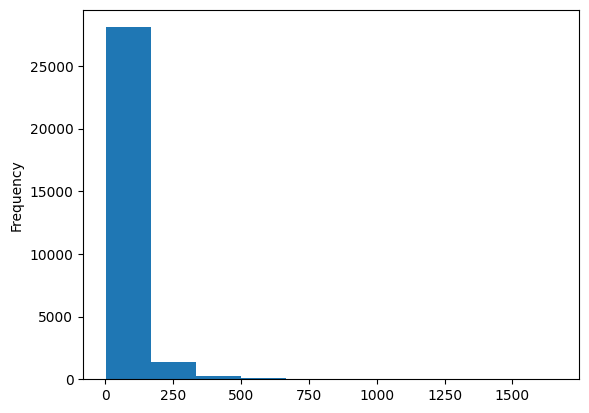

In [10]:
df.text.apply(lambda x: len(x.split())).plot(kind='hist')

In [11]:
import numpy as np

for l in np.unique(df['label']):
  print(l)

Mixed
Negative
Positive


In [12]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['label'] = LE.fit_transform(df['label'])
df.head()

,label,text
26002,2,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...
80420,1,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...
19864,2,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...
81525,1,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...
57878,0,اربع نجوم لولا الملل الذي اصابني في النهاية......


In [13]:
for l in np.unique(df['label']):
  print(l)

0
1
2


In [14]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.2, random_state=42)
train.head()

,label,text
26667,2,استمتعت . الموقع الخصوصيه. عدم توفر الانترنت
66268,0,مكان الفندق رائع قريب من المسجد النبوي . قرب م...
88175,1,لن اكرر الاقامة . . رائحة الشراشف سيئة لايوضع ...
34168,0,بسيط وممتع الى حد ما
35914,0,مرضي. القرب من الحرم. الاثاث لا يرتقي لفندق خم...


In [15]:
train.reset_index(drop=True, inplace=True)
train.head()

,label,text
0,2,استمتعت . الموقع الخصوصيه. عدم توفر الانترنت
1,0,مكان الفندق رائع قريب من المسجد النبوي . قرب م...
2,1,لن اكرر الاقامة . . رائحة الشراشف سيئة لايوضع ...
3,0,بسيط وممتع الى حد ما
4,0,مرضي. القرب من الحرم. الاثاث لا يرتقي لفندق خم...


In [16]:
val.reset_index(drop=True, inplace=True)
val.head(5)

,label,text
0,0,يحتاج للتطوير . تسجيل الخروج المتأخر. دخول تنظ...
1,1,المجهود المبالغ فيه فى اختيار و رسم التعابير و...
2,1,اخيس كتاب القصه مقتبسه
3,2,استثنائي. النظافه الطاغية في المكان والرقي في ...
4,1,لا انصح بالسكن فيه حتى يجدد . الموقع جيد ولكن ...


In [17]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)

Training Set Shape : (24000, 2)
Validation Set Shape : (6000, 2)


In [18]:
x_train = train['text'].to_numpy()
y_train = train['label'].to_numpy()
x_test = val['text'].to_numpy()
y_test = val['label'].to_numpy()

In [19]:
y_train

array([2, 0, 1, ..., 1, 2, 0])

In [20]:
y_test

array([0, 1, 1, ..., 0, 2, 2])

In [21]:
pip install ktrain==0.32.3

In [22]:
pip install tensorflow==2.15.0

In [23]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-uncased'
categories = ['Mixed','Negative','Positive']
t = text.Transformer(MODEL_NAME, maxlen=200, class_names= categories)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

preprocessing train...
language: ar
train sequence lengths:
	mean : 55
	95percentile : 198
	99percentile : 439


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 55
	95percentile : 195
	99percentile : 445


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

In [24]:
import time
start = time.time()
learner.fit_onecycle(2e-5, 4)
stop = time.time()
print(f"Training time: {stop - start}s")



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1500/1500 [==============================] - 1068s 696ms/step - loss: 0.9444 - accuracy: 0.4982 - val_loss: 0.8375 - val_accuracy: 0.5737
Epoch 2/4
1500/1500 [==============================] - 1034s 690ms/step - loss: 0.8024 - accuracy: 0.5982 - val_loss: 0.7723 - val_accuracy: 0.6305
Epoch 3/4
1500/1500 [==============================] - 1039s 693ms/step - loss: 0.7493 - accuracy: 0.6369 - val_loss: 0.7396 - val_accuracy: 0.6405
Epoch 4/4
1500/1500 [==============================] - 1035s 690ms/step - loss: 0.6705 - accuracy: 0.6869 - val_loss: 0.7322 - val_accuracy: 0.6605
Training time: 4178.177691459656s


In [25]:
learner.validate(class_names= categories)

188/188 [==============================] - 81s 415ms/step
              precision    recall  f1-score   support

       Mixed       0.60      0.53      0.56      1991
    Negative       0.68      0.74      0.71      2067
    Positive       0.69      0.71      0.70      1942

    accuracy                           0.66      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.66      0.66      0.66      6000



array([[1056,  493,  442],
       [ 364, 1520,  183],
       [ 328,  227, 1387]])

In [26]:
predictor = ktrain.get_predictor(learner.model, preproc=t).save('/content/drive/My Drive/03. path/Finetune_BERT/Finetuned_Arabic_Sentiment_BERT')

In [27]:
predictor = ktrain.load_predictor('/content/drive/My Drive/03. path/Finetune_BERT/Finetuned_Arabic_Sentiment_BERT')
model = ktrain.get_predictor(predictor.model, predictor.preproc)

x = ["كله رائع بجد ربنا يكرمك", "اتقوا الله فينا بكفي رفع اسعار الرواتب بالحضيض"]
predictions = model.predict(x)

print(predictions)

1/1 [==============================] - 3s 3s/step
['Positive', 'Positive']


In [28]:
import numpy as np

random_5_row = random_5_row.copy()

predicted_sentiments = []

for title in random_5_row['text']:

    predictions = model.predict(title)

    print(predictions)

    predicted_sentiments.append(predictions)

random_5_row['predicted_sentiment'] = predicted_sentiments

random_5_row

1/1 [==============================] - 0s 111ms/step
Mixed
1/1 [==============================] - 0s 110ms/step
Negative
1/1 [==============================] - 0s 120ms/step
Mixed
1/1 [==============================] - 0s 118ms/step
Negative
1/1 [==============================] - 0s 116ms/step
Mixed


,label,text,predicted_sentiment
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...,Mixed
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...,Negative
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...,Mixed
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...,Negative
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......,Mixed
